#Visualização de Dados Financeiros

##Importar e Instalar Libs

In [66]:
!pip install -q yfinance

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt
from pandas_datareader import data

##Leitura da Base de Dados no YAHOO (Ações da GOL)

In [68]:
gol_df = yf.download('GOLL4.SA',start='2015-01-01');

[*********************100%***********************]  1 of 1 completed


In [69]:
gol_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500


Informações dos tipos

In [70]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1634 entries, 2015-01-02 to 2021-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1634 non-null   float64
 1   High       1634 non-null   float64
 2   Low        1634 non-null   float64
 3   Close      1634 non-null   float64
 4   Adj Close  1634 non-null   float64
 5   Volume     1634 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 89.4 KB


Tipos de dados

In [71]:
gol_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Estátisticas

In [72]:
gol_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1.634000e+03
mean,15.620698,16.001561,15.217681,15.583629,15.583629,4.959814e+06
std,10.069644,10.256127,9.876646,10.063812,10.063812,4.853739e+06
min,1.160000,1.180000,1.130000,1.160000,1.160000,0.000000e+00
25%,7.492500,7.720000,7.342500,7.505000,7.505000,1.903625e+06
50%,13.700000,14.075000,13.355000,13.600000,13.600000,3.304800e+06
75%,22.842500,23.345000,22.335001,22.802500,22.802500,6.261725e+06
max,43.669998,44.619999,41.310001,43.790001,43.790001,4.368050e+07


Valores Máximos e Mínimos

In [73]:
gol_df.query('Close >= 43.79 | Close <= 1.16') 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-22,1.20,1.260000,1.14,1.160000,1.160000,3830600
2019-08-01,41.25,44.619999,41.25,43.790001,43.790001,6664200


In [74]:
gol_df.to_csv('gol.csv')

Leitura da Base de Dados criada

In [75]:
gol_df = pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/gol.csv')

##Leitura de mais Ações no YAHOO

In [95]:
acoes=['GOLL4.SA','CVCB3.SA','WEGE3.SA','MGLU3.SA','TOTS3.SA','ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR3.SA', 'BBAS3.SA','BOVA11.SA']

In [96]:
acoes_df=pd.DataFrame()

for acao in acoes:
  acoes_df[acao]=yf.download(acao, start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [98]:
acoes_df= acoes_df.rename(columns={'GOLL4.SA':'GOL','CVCB3.SA':'CVC','WEGE3.SA':'WEGE',
                                   'MGLU3.SA':'MGLU','TOTS3.SA':'TOTS',	'ABEV3.SA': 'AMBEV', 
                                   'ODPV3.SA': 'ODONTOPREV', 'VIVT3.SA': 'VIVO',
                                   'PETR3.SA': 'PETROBRAS', 'BBAS3.SA': 'BBRASIL',
                                   'BOVA11.SA':'BOVA'})

In [99]:
acoes_df.head()

,GOL,CVC,WEGE,MGLU,TOTS,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
Date,,,,,,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,16.020000,9.37,37.820000,9.00,22.650000,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,15.730000,9.62,37.070000,8.27,22.180000,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,16.330000,9.55,36.150002,8.06,22.490000,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,16.559999,9.69,37.389999,8.45,23.480000,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,16.540001,9.66,38.910000,9.02,23.559999,48.509998


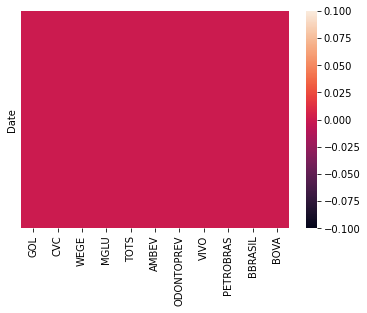

In [100]:
sns.heatmap(acoes_df.isnull(),yticklabels=False);

In [101]:
acoes_df.shape

(1634, 11)

In [102]:
acoes_df.describe()

,GOL,CVC,WEGE,MGLU,TOTS,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,15.583629,31.448380,13.548024,6.716626,15.157694,17.901206,13.353721,41.055991,19.848280,32.271481,76.665950
std,10.063812,15.708152,10.901333,8.111377,7.815349,2.429331,2.208703,5.099022,7.487948,10.400905,23.241933
min,1.160000,6.106568,4.942307,0.030585,7.156402,11.030000,9.000000,28.980000,5.910000,12.700000,36.450001
25%,7.505000,18.177500,6.462499,0.242245,9.918654,16.750000,11.452500,37.060001,13.732500,24.350000,55.985000
50%,13.600000,25.170000,8.815000,3.034375,11.029044,18.299999,13.150000,41.299999,19.010000,31.340000,74.364998
75%,22.802500,45.360001,15.177500,10.840625,19.333332,19.240000,15.177500,44.330002,27.282501,38.047500,95.694998
max,43.790001,64.800003,46.105000,27.450001,38.480000,24.270000,18.430000,56.740002,33.450001,55.180000,125.750000


In [83]:
acoes_df = pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/acoes.csv')

In [117]:
acoes_df.columns

Index(['Date', 'GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'AMBEV', 'ODONTOPREV',
       'VIVO', 'PETROBRAS', 'BBRASIL', 'BOVA'],
      dtype='object')

##Visualização

###Histograma

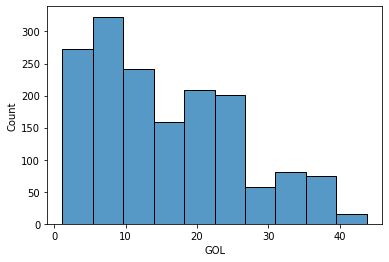

In [104]:
sns.histplot(acoes_df['GOL'],bins=10);

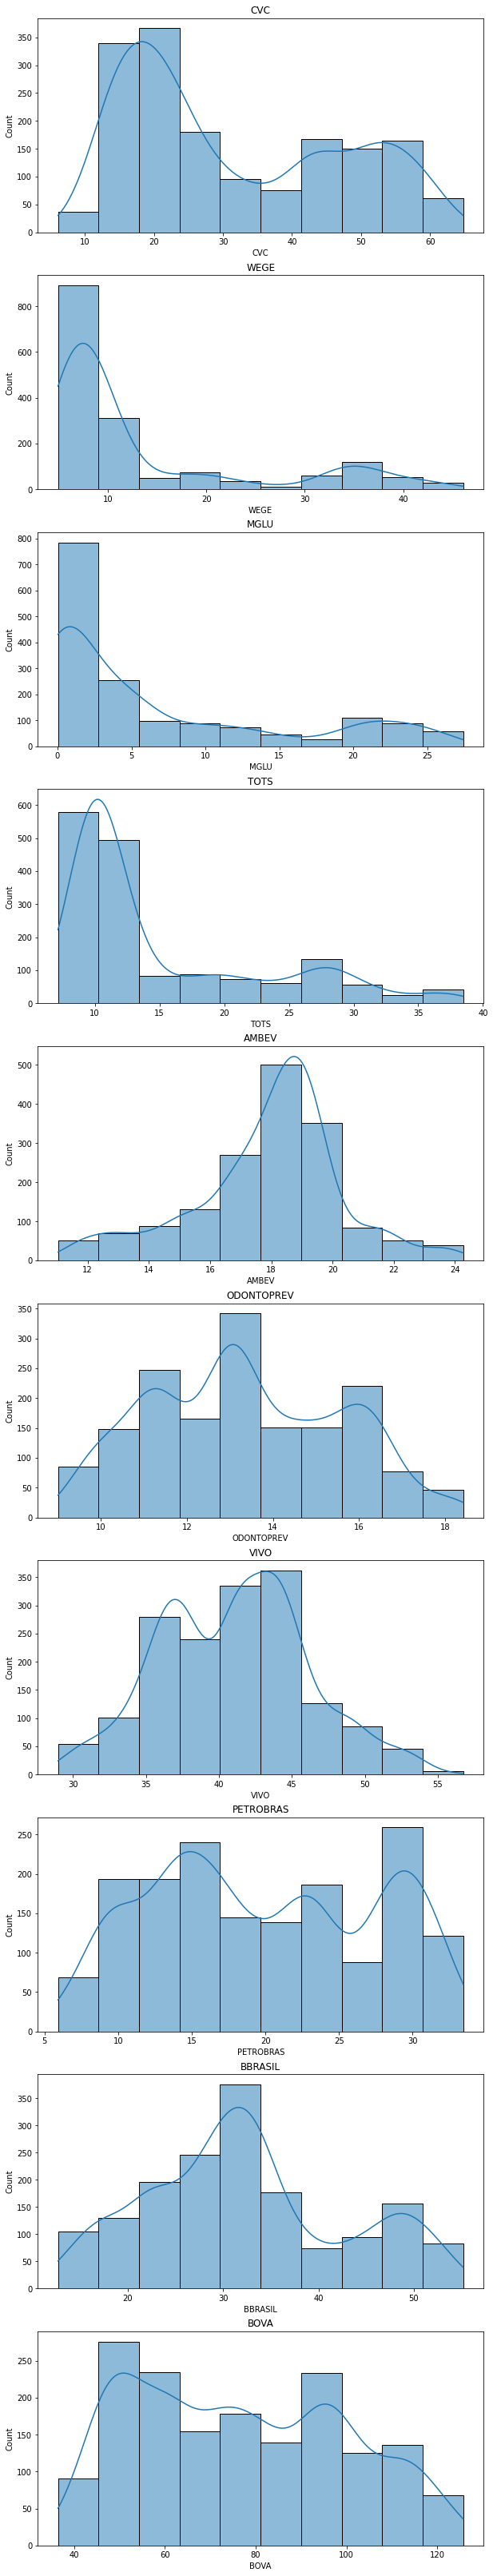

In [109]:
plt.figure(figsize=(10,70))
i=1

for i in np.arange(1,len(acoes_df.columns)):
  plt.subplot(12,1,i+1)
  sns.histplot(acoes_df[acoes_df.columns[i]],bins=10,kde=True)
  plt.title(acoes_df.columns[i])

###Boxplot

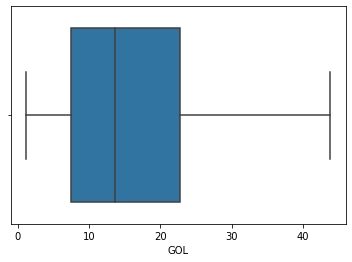

In [110]:
sns.boxplot(x=acoes_df['GOL']);

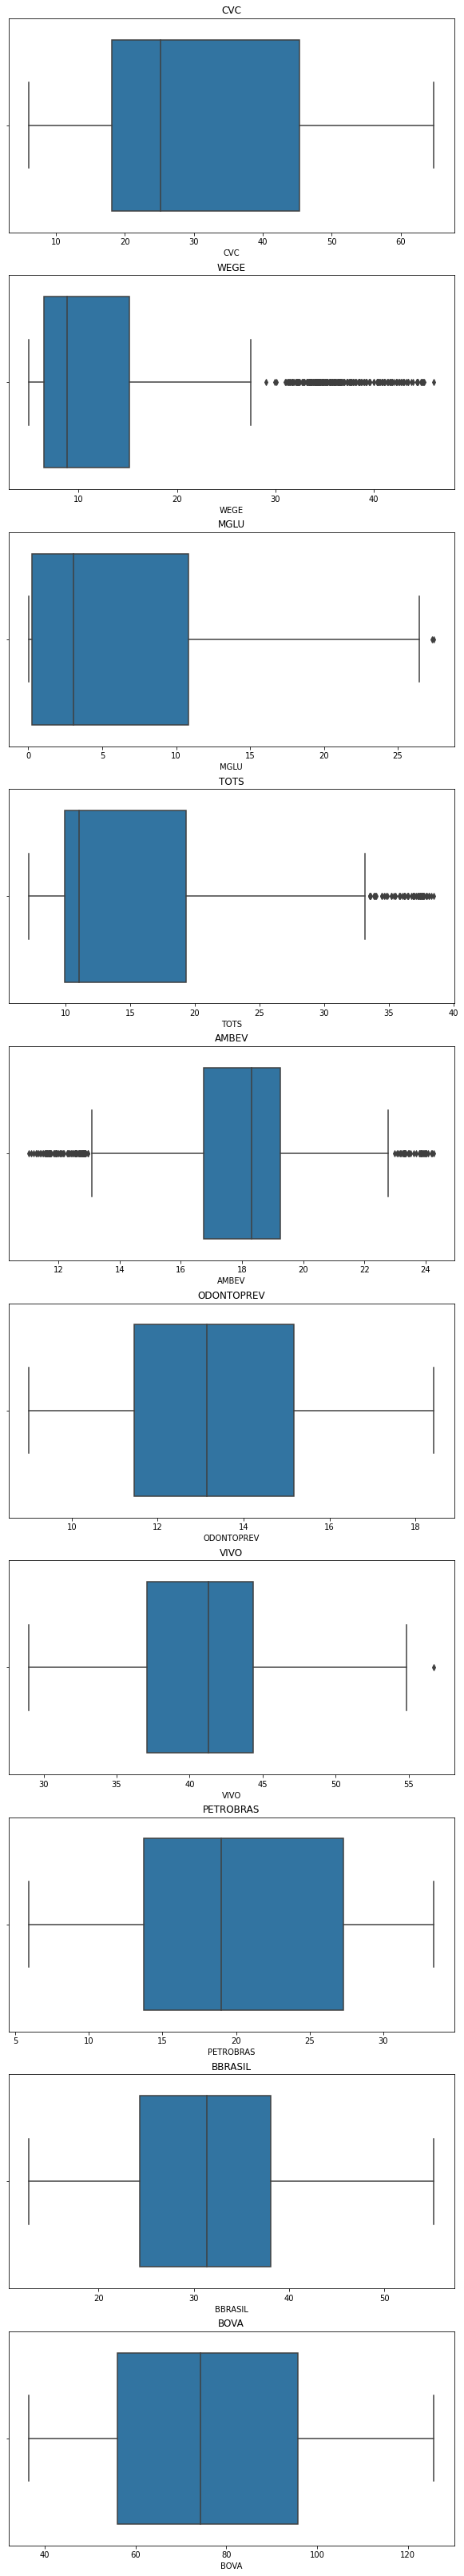

In [111]:
plt.figure(figsize=(10,70))
i=1

for i in np.arange(1,len(acoes_df.columns)):
  plt.subplot(12,1,i+1)
  sns.boxplot(x=acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

###Linhas

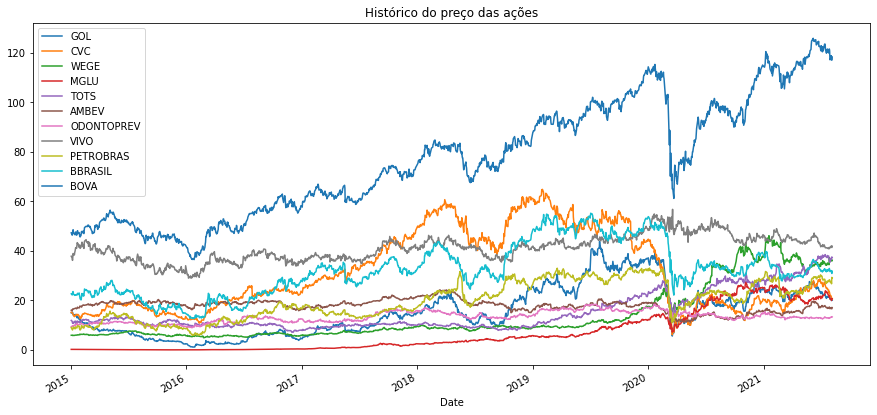

In [120]:
acoes_df.plot(x='Date',figsize=(15,7),title='Histórico do preço das ações');

###Linhas Normalizado

In [122]:
acoes_df_normalizado = acoes_df.copy()

for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i]=acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [123]:
acoes_df_normalizado.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449


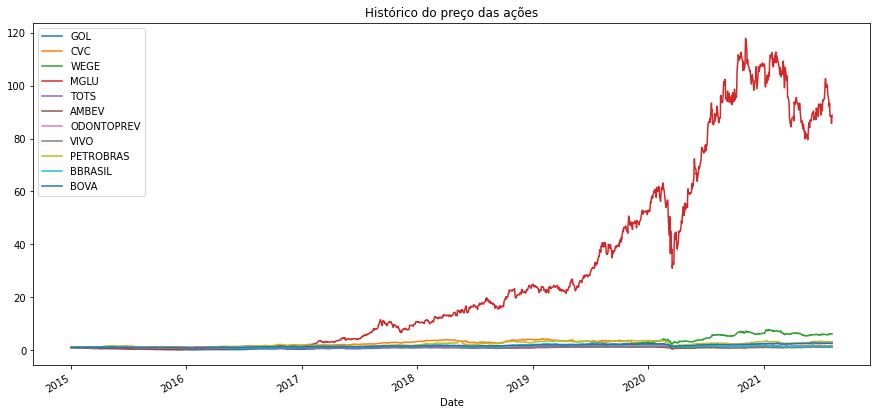

In [124]:
acoes_df_normalizado.plot(x='Date',figsize=(15,7),title='Histórico do preço das ações');

###Gráfico Dinâmico das Ações

In [125]:
figura = px.line(title='Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x=acoes_df['Date'],y=acoes_df[i],name=i)
figura.show()

In [126]:
figura = px.line(title='Histórico do preço das ações - Normalizado')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x=acoes_df_normalizado['Date'],y=acoes_df_normalizado[i],name=i)
figura.show()